# Load Data

In [1]:
import os
print(os.listdir("./heartbeat"))

['mitbih_test.csv', 'mitbih_train.csv', '.ipynb_checkpoints']


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [3]:
train_df=pd.read_csv('./heartbeat/mitbih_train.csv',header=None)
test_df=pd.read_csv('./heartbeat/mitbih_test.csv',header=None)

In [149]:
train_df.shape

(100000, 188)

In [145]:
test_df.shape

(21892, 188)

# Balance Data

In [4]:
train_df[187] = train_df[187].astype(int)
equilibre = train_df[187].value_counts()
print(equilibre)

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64


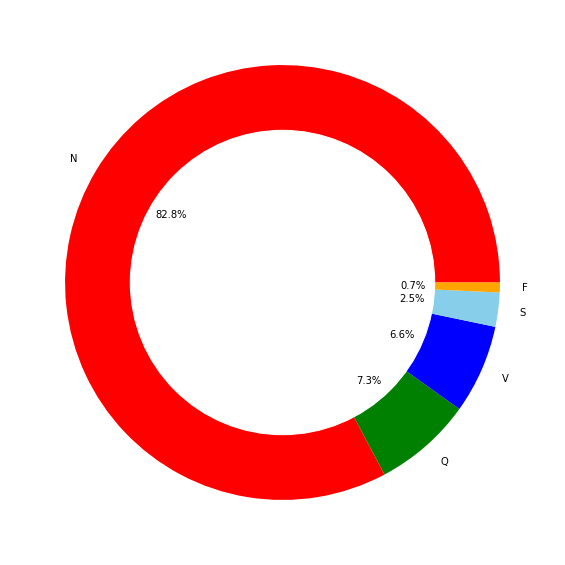

In [5]:
plt.figure(figsize=(12,10))
circle = plt.Circle((0,0), .7, color='white')
plt.pie(equilibre, labels=['N', 'Q', 'V', 'S', 'F'], colors=['red', 'green', 'blue', 'skyblue', 'orange'], autopct='%1.1f%%')
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

## As you can see, there is an imbalance in the dataset. 
## Resampling the dataset

In [6]:
from sklearn.utils import resample
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
df_0=(train_df[train_df[187]==0]).sample(n=20000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

equilibre=train_df[187].value_counts()
print(equilibre)

4    20000
3    20000
2    20000
1    20000
0    20000
Name: 187, dtype: int64


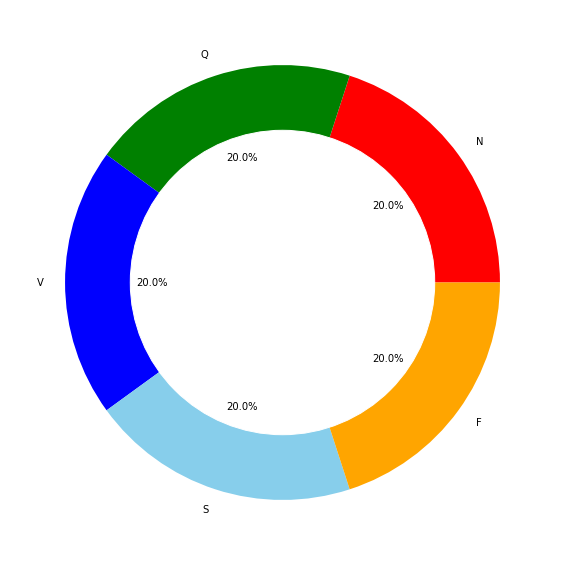

In [7]:
plt.figure(figsize=(12,10))
circle = plt.Circle((0,0), .7, color='white')
plt.pie(equilibre, labels=['N', 'Q', 'V', 'S', 'F'], colors=['red', 'green', 'blue', 'skyblue', 'orange'], autopct='%1.1f%%')
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

# Study Different Classes

In [45]:
c = train_df.groupby(187, group_keys=False).apply(lambda train_df : train_df.sample(1))
c

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
51051,0.979351,0.849558,0.383481,0.000000,0.153392,0.333333,0.395280,0.407080,0.454277,0.436578,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
72778,0.896000,0.888000,0.248000,0.000000,0.068000,0.144000,0.132000,0.152000,0.200000,0.176000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
77417,0.717391,0.649457,0.396739,0.260870,0.269022,0.239130,0.247283,0.252717,0.279891,0.271739,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
80758,0.986817,1.000000,0.606403,0.301318,0.167608,0.126177,0.099812,0.082863,0.071563,0.071563,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
85359,0.983402,0.514523,0.547718,0.551867,0.551867,0.526971,0.543568,0.489627,0.381743,0.236515,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


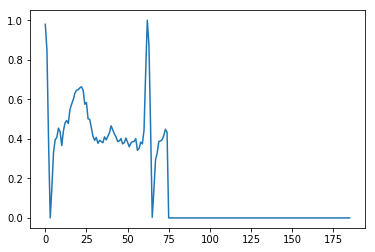

In [50]:
# Plot of a healthy heartbeat
plt.plot(c.iloc[0,:186])

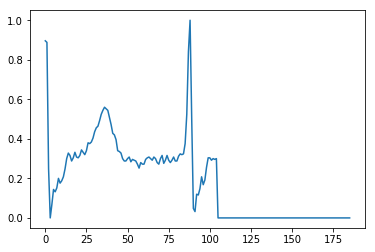

In [52]:
# Plot of a Supraventricular premature beat
plt.plot(c.iloc[1,:186])

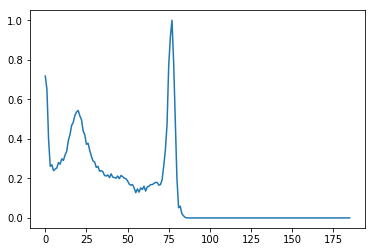

In [53]:
# Plot of a Premature ventricular contraction
plt.plot(c.iloc[2,:186])

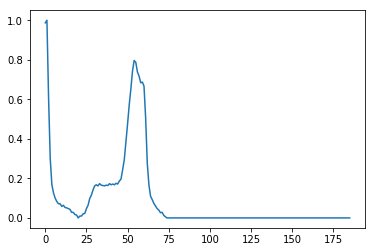

In [54]:
# Plot of a Fusion of ventricular and normal beat
plt.plot(c.iloc[3,:186])

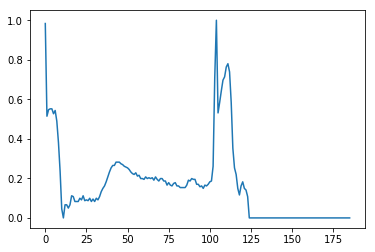

In [55]:
# Plot of a Fusion Unclassifiable beat
plt.plot(c.iloc[4,:186])

In [18]:
target_train=train_df[187]
target_test=test_df[187]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)

In [159]:
y_train.shape

(100000, 5)

In [9]:
# Seperate training data X to target data
X_train=train_df.iloc[:,:186].values
X_test=test_df.iloc[:,:186].values
X_train = X_train[..., np.newaxis] 
X_test = X_test[..., np.newaxis] 

In [192]:
X_train.shape

(100000, 186, 1)

# Network Model

In [10]:
def network(X_train,y_train,X_test,y_test):
    

    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
    conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
    conv3_1=BatchNormalization()(conv3_1)
    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
    flatten=Flatten()(pool3)
    dense_end1 = Dense(64, activation='relu')(flatten)
    dense_end2 = Dense(32, activation='relu')(dense_end1)
    main_output = Dense(5, activation='softmax', name='main_output')(dense_end2)
    
    
    model = Model(inputs= inputs_cnn, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
    
    
    callbacks = [EarlyStopping(monitor='val_loss', patience=8),
             ModelCheckpoint(filepath='heart_model.h5', monitor='val_loss', save_best_only=True)]

    history=model.fit(X_train, y_train,epochs=40,callbacks=callbacks, batch_size=32,validation_data=(X_test,y_test))
    model.load_weights('heart_model.h5')
    return(model,history)

In [39]:
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3','4']
    
    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)
    
    print('Prediction:')
    print(prediction)
    print('\nCNF Matrix:')
    print(cnf_matrix)

# Import Keras for training

In [13]:
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
from keras.layers.normalization import BatchNormalization
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

model,history=network(X_train,y_train,X_test,y_test)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Train on 100000 samples, validate on 21892 samples
Epoch 1/40
100000/100000 [==============================] - 29s 294us/step - loss: 0.1879 - accuracy: 0.9331 - val_loss: 0.1946 - val_accuracy: 0.9305
Epoch 2/40
100000/100000 [==============================] - 26s 256us/step - loss: 0.0721 - accuracy: 0.9750 - val_loss: 0.1370 - val_accuracy: 0.9608
Epoch 3/40
100000/100000 [==============================] - 26s 257us/step - loss: 0.0487 - accuracy: 0.9838 - val_loss: 0.1084 - val_accuracy: 0.9721
Epoch 4/40
100000/100000 [==============================] - 26s 255us/step - loss: 0.0366 - accuracy: 0.9882 - val_loss: 0.1049 - val_accuracy: 0.9733
Epoch 5/40
100000/100000 [==============================] - 26s 256us/step - loss: 0.0287 - accuracy: 0.9909 - val_loss: 0.1776 - val_accuracy: 0.9525
Epoch 6/40
100000/100000 [==============================] - 26s 255us/step - loss: 0.0247 - accuracy: 0.9921 - 

Accuracy: 97.33%


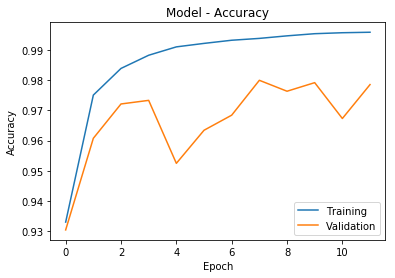

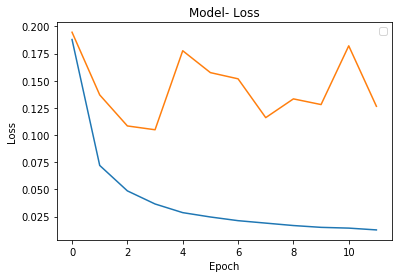

prediction
[0 0 0 ... 4 4 4]

 CNF Matrix
[[17738   221    64    79    16]
 [   70   469    12     4     1]
 [   28     4  1383    27     6]
 [    8     0    11   143     0]
 [   27     2     4     1  1574]]


In [40]:
evaluate_model(history,X_test,y_test,model)
# y_pred=model.predict(X_test)
# y_pred=model.predict(X_test[:1,:])

In [65]:
prediction=np.argmax(y_pred,axis=1)
classes = np.array(['Normal beat', 'Supraventricular premature beat', 'Premature ventricular contraction', 'Fusion of ventricular and normal beat', 'Unclassifiable beat'])
prediction
len(classes[prediction])


21892

In [47]:
prediction = pd.DataFrame(prediction)
prediction.shape

(21892, 1)

In [70]:
def return_prediction(model, sample):
    classes = np.array(['Normal beat', 'Supraventricular premature beat', 'Premature ventricular contraction', 'Fusion of ventricular and normal beat', 'Unclassifiable beat'])
    y_pred = model.predict(sample)
    predict = np.argmax(y_pred,axis=1)
    return classes[predict]

In [71]:
return_prediction(model, X_test)

array(['Normal beat', 'Normal beat', 'Normal beat', ...,
       'Unclassifiable beat', 'Unclassifiable beat',
       'Unclassifiable beat'], dtype='<U37')

In [46]:
yy_pred = pd.DataFrame(y_pred)
yy_pred
# X_test[:1,:].shape

,0,1,2,3,4
0,9.999996e-01,3.548785e-07,7.884812e-09,7.830621e-12,4.128829e-14
1,9.949314e-01,4.686801e-05,6.786608e-04,4.343084e-03,4.937525e-08
2,9.981413e-01,1.858677e-03,1.602752e-09,1.213106e-13,9.948156e-15
3,9.999996e-01,1.768205e-11,4.107564e-07,1.121596e-17,9.036739e-13
4,9.999518e-01,5.526654e-08,4.443619e-05,7.051730e-08,3.695768e-06
...,...,...,...,...,...
21887,1.457294e-11,8.960473e-12,1.067277e-09,5.089155e-18,1.000000e+00
21888,1.803625e-08,6.174932e-09,8.563345e-07,1.847057e-14,9.999992e-01
21889,4.280987e-04,1.449220e-08,3.492177e-07,2.143544e-13,9.995715e-01
21890,8.325375e-12,1.311890e-12,1.821141e-10,1.469462e-21,1.000000e+00


Normalized confusion matrix


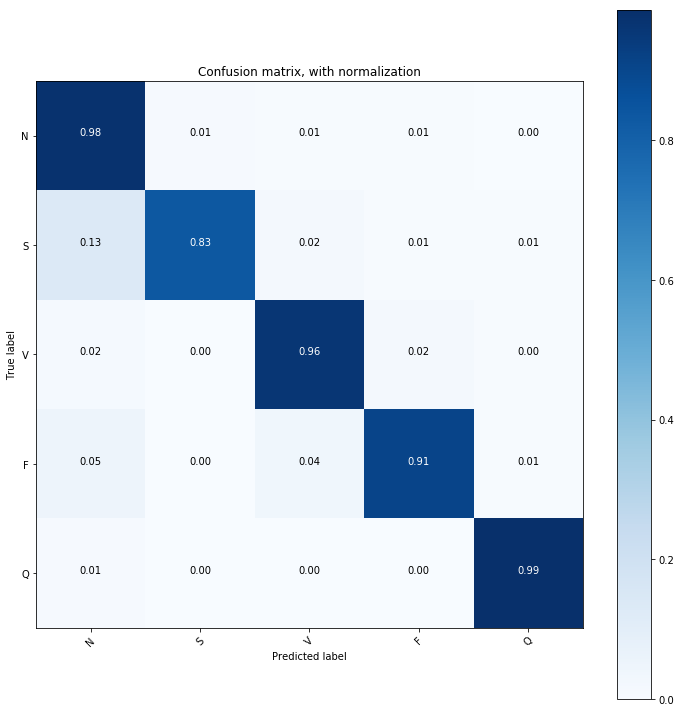

In [130]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()